In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [3]:
train_df = pd.read_csv(r"C:\Users\helco\OneDrive\바탕 화면\h-dat\실습 데이터(HDAT-DA Fast Track)\자전거\bicycle_train.csv")
test_df = pd.read_csv(r"C:\Users\helco\OneDrive\바탕 화면\h-dat\실습 데이터(HDAT-DA Fast Track)\자전거\bicycle_test.csv")

In [4]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


 # EDA(데이터 분류, 결측치 처리)

In [5]:
# 데이터가 아닌 것들 : 'datetime','casual','registered'
# 카테고리 데이터 : 'season', 'holiday', 'workingday', 'weather'
# 연속된 숫자 데이터 : 'temp', 'atemp', 'humidity', 'windspeed',
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
train_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
test_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

# FE(데이터 추출, 인코딩, 스케일링)

In [8]:
train_df['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [9]:
# 데이터가 아닌 것에서 데이터 추출
train_df['year'] = pd.to_datetime( train_df['datetime'] ).dt.year
train_df['month'] = pd.to_datetime( train_df['datetime'] ).dt.month
train_df['day'] = pd.to_datetime(train_df['datetime']).dt.day
train_df['hour'] = pd.to_datetime( train_df['datetime'] ).dt.hour

test_df['year'] = pd.to_datetime( test_df['datetime'] ).dt.year
test_df['month'] = pd.to_datetime( test_df['datetime'] ).dt.month
test_df['day'] = pd.to_datetime(train_df['datetime']).dt.day
test_df['hour'] = pd.to_datetime( test_df['datetime'] ).dt.hour

In [10]:
train_df['sin_hour'] = np.sin( (train_df['hour']/24) * 2 * np.pi )
train_df['cos_hour'] = np.cos( (train_df['hour']/24) * 2 * np.pi )
train_df['sin_month'] = np.sin( (train_df['month']/12) * 2 * np.pi )
train_df['cos_month'] = np.cos( (train_df['month']/12) * 2 * np.pi )

test_df['sin_hour'] = np.sin( (train_df['hour']/24) * 2 * np.pi )
test_df['cos_hour'] = np.cos( (train_df['hour']/24) * 2 * np.pi )
test_df['sin_month'] = np.sin( (train_df['month']/12) * 2 * np.pi )
test_df['cos_month'] = np.cos( (train_df['month']/12) * 2 * np.pi )

In [11]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,sin_hour,cos_hour,sin_month,cos_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0.000000,1.000000,5.000000e-01,0.866025
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0.258819,0.965926,5.000000e-01,0.866025
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0.500000,0.866025,5.000000e-01,0.866025
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0.707107,0.707107,5.000000e-01,0.866025
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0.866025,0.500000,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,-0.965926,0.258819,-2.449294e-16,1.000000
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,-0.866025,0.500000,-2.449294e-16,1.000000
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,-0.707107,0.707107,-2.449294e-16,1.000000
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,-0.500000,0.866025,-2.449294e-16,1.000000


In [19]:
train_df['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

# 스케일링

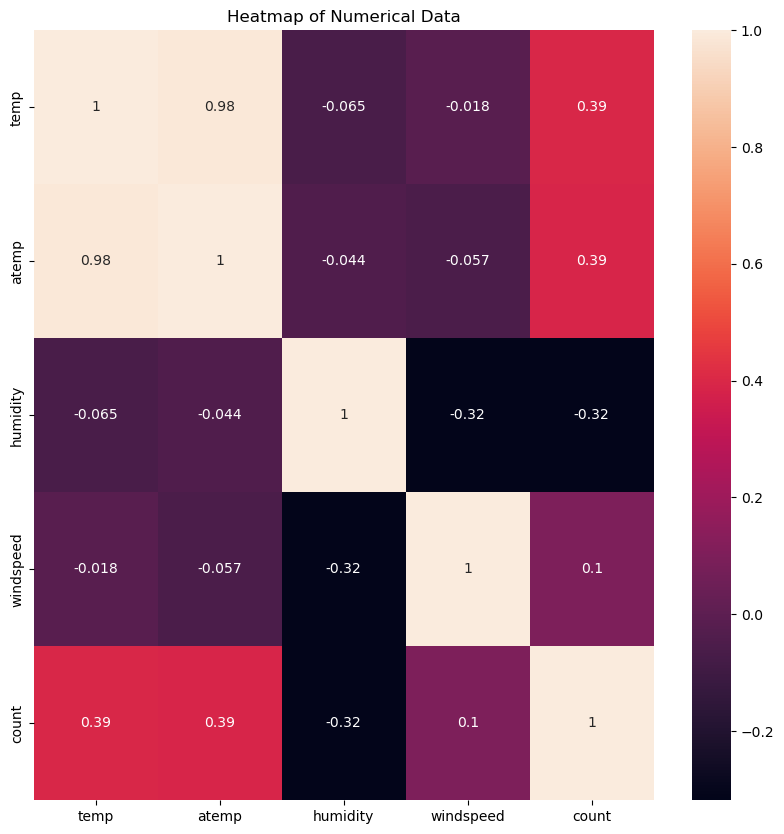

In [13]:
# 피처 간 상관관계 매트릭스
corrMat = train_df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() 
fig, ax= plt.subplots() 
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

windspeed와 count는 0.1 상관관계 이므로 예측하는데 도움이 낮아 제거.

In [14]:
# 스케일링
from sklearn.preprocessing import StandardScaler
num_features = ['temp', 'humidity',
                'sin_hour', 'cos_hour', 'sin_month', 'cos_month']

sc = StandardScaler()
sc.fit( train_df[num_features]  )
X = pd.DataFrame( sc.transform( train_df[num_features] ), columns=num_features )
test_X = pd.DataFrame( sc.transform( test_df[num_features] ), columns=num_features )

# 인코딩

In [15]:
from sklearn.preprocessing import OneHotEncoder

cate_features = [ 'season', 'holiday', 'workingday', 'weather', 'year']
one_hot = OneHotEncoder(sparse_output=False, drop = 'first')
one_hot.fit(train_df[cate_features])
X[one_hot.get_feature_names_out()] = one_hot.transform( train_df[cate_features] )
test_X[one_hot.get_feature_names_out()] = one_hot.transform( test_df[cate_features] )

## 훈련용 데이터와 검증용 데이터로 나누기

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV

y = train_df['count']
y2 = train_df[['casual', 'registered',]]

In [17]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y,
                                                      test_size=0.3, 
                                                      random_state=42)

 # ML모델을 사용해서 예측(선형회귀, KNN, 랜덤포레스트)

## 선형회귀

In [32]:
from sklearn.linear_model import LinearRegression, Lasso

y = train_df['count']
train_x, valid_x, train_y, valid_y = train_test_split(X,y, 
                                                      test_size = 0.3 ,
                                                      random_state=17)

In [33]:
lr = LinearRegression()
lr.fit(train_x, train_y) # 회귀계수가 계산됨
lr.coef_ # 각 feature들의 회귀계수가 계산됨 # 각 feature(입력 변수)가 예측값에 얼마나 영향을 주는지

array([ 24.2016136 ,  -4.38869992,  -3.96922115, -69.49413941,
       -71.40733444, -16.52449218, -19.68487819,  25.0573467 ,
         5.74276958,  49.99815147,  -1.92667832,   1.10958761,
       -18.62322892, -74.08479296, -83.86910882,  89.63393572])

In [34]:
lr.score(valid_x, valid_y) # 결정 계수(R²)를 반환

# 1에 가까울수록: 모델이 데이터의 변동성을 잘 설명하고 있음 (좋은 모델)
# 0에 가까울수록: 모델이 데이터의 변동성을 거의 설명하지 못함 (나쁜 모델)
# 음수값: 단순히 평균값으로 예측하는 것보다도 나쁜 성능 (매우 나쁜 모델)

0.5136179434727572

In [35]:
# (valid_y - lr.predict(valid_x)) ** 2 # 오차를 계산, mse

from sklearn.metrics import mean_squared_error

mean_squared_error(valid_y, lr.predict(valid_x)) ** 0.5   # RMSE

129.16363280580583

In [ ]:
result1 = test_df[['datetime']].copy()
result1['count'] = lr.predict(test_X)
result1.to_csv(r'C:\Users\USER\Desktop\현대엔지비 파일\교안 및 실습파일\bicycle.csv', index=False)

 ## KNN

In [36]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

In [37]:
y = train_df['count']
train_x, valid_x, train_y, valid_y = train_test_split(X,y, 
                                                      test_size = 0.3 ,
                                                      random_state=17)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error
import pandas as pd

# 1. 하이퍼파라미터 후보 설정: n_neighbors는 KNN의 핵심 값
params = {'n_neighbors' : [3,5,10,15,20,25,30]}

# 2. GridSearchCV로 최적의 n_neighbors를 찾음
#    - 5겹 교차검증(cv=5)
#    - 성능 지표는 RMSLE (오차가 작을수록 좋은 지표 → 음수 반환됨)
grid_knn = GridSearchCV(KNeighborsRegressor(), 
                        params, 
                        cv=5,
                        scoring='neg_root_mean_squared_log_error')  # RMSLE를 음수로 반환

# 3. 훈련 데이터로 GridSearchCV 실행 (교차검증 포함)
grid_knn.fit(train_x, train_y)

# 4. 가장 성능이 좋았던 n_neighbors 값 확인
grid_knn.best_params_

# 5. 각 파라미터 조합의 평균 RMSLE 결과 (음수 형태)
grid_knn.cv_results_['mean_test_score']

# 6. 하이퍼파라미터와 대응되는 점수들을 DataFrame으로 보기 좋게 정리
cv_result = pd.DataFrame(grid_knn.cv_results_['params'])
cv_result['score'] = grid_knn.cv_results_['mean_test_score']  # 음수 RMSLE

# 7. 피벗테이블로 n_neighbors 별 성능 비교 (열: n_neighbors, 행: score)
pd.pivot_table(cv_result, columns='n_neighbors')

# 8. 검증 데이터(valid_x)에서 최적 모델의 성능 확인 (GridSearchCV 내부적으로 best_estimator_ 사용)
#    여기서 반환되는 값도 RMSLE이므로 역시 음수
grid_knn.score(valid_x, valid_y)

# 9. 검증 데이터에서 실제 RMSLE 계산 (음수 아님 → 사람이 해석하기 쉬움)
mean_squared_log_error(valid_y, grid_knn.predict(valid_x)) ** 0.5  # 양수 RMSLE


0.5658809606084608

In [ ]:
result2 = test_df[['datetime']].copy()
result2['count'] = grid_knn.predict(test_X)
result2.to_csv(r'C:\Users\USER\Desktop\현대엔지비 파일\교안 및 실습파일\bicycleKNN.csv', index=False)

## 하이퍼 파라미터 찾고 랜덤 포레스트 사용

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
y = train_df['count']
train_x, valid_x, train_y, valid_y = train_test_split(X,y, 
                                                      test_size = 0.3 ,
                                                      random_state=17)

In [30]:
params = {'max_depth' : [5, 10, 15, 20],
            'min_samples_leaf':[1, 5, 10, 15, 20]}

grid_rf1 = GridSearchCV( RandomForestRegressor(random_state=42), params, cv=5,
                         scoring='neg_mean_squared_log_error')
# 자전거는 보통 0대 렌탈인데, 특정 시간에만 많이 대여된다(아웃 라이어), 많이 대여되는 시간대는 틀리면 안되니까 log에러 사용
grid_rf1.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             scoring='neg_mean_squared_log_error')

neg_root_mean_squared_error

'neg'가 붙는 이유:

scikit-learn의 점수 원칙: scikit-learn에서 모든 점수(score)는 **"높을수록 좋은 모델"**이라는 일관된 원칙을 따릅니다.

오차 지표의 특성: RMSE(Root Mean Squared Error)와 같은 오차 지표는 값이 **"낮을수록 좋은 모델"**을 의미합니다.

모순 해결 방법: 이 모순을 해결하기 위해, scikit-learn은 오차 지표에 음수(negative)를 취하고 'neg_'를 접두사로 붙입니다.

작동 방식:

RMSE 값에 -1을 곱합니다
예: RMSE가 10이면 neg_RMSE는 -10입니다
모델 비교 시, -10보다 -5가 더 크므로, RMSE=5인 모델이 더 좋은 모델로 선택됩니다

In [44]:
grid_rf1.best_params_ # 20, 1은 오버피팅으로 예상(깊게 들어가서)

{'max_depth': 15, 'min_samples_leaf': 1}

In [46]:
-1 * grid_rf1.score(valid_x, valid_y) # 계산된 오차

0.05809197035512514

In [50]:
cv_result = pd.DataFrame( grid_rf1.cv_results_['params'])
cv_result['score'] = grid_rf1.cv_results_['mean_test_score']
pd.pivot_table( cv_result, columns='max_depth', index='min_samples_leaf')

score                              
max_depth               5         10        15        20
min_samples_leaf                                        
1                -0.455062 -0.144766 -0.132531 -0.132583
5                -0.455082 -0.154040 -0.145797 -0.145755
10               -0.455316 -0.176183 -0.171299 -0.171299
15               -0.455524 -0.200219 -0.197262 -0.197260
20               -0.456161 -0.223366 -0.221167 -0.221167

In [51]:
grid_rf1.score(valid_x, valid_y)

-0.05809197035512514

In [52]:
grid_rf1.predict(test_X)

array([ 12.6489266 ,   5.48147053,   6.62501438, ..., 191.37897806,
       309.87      , 298.92      ])

In [54]:
rf_result = test_df[["datetime"]].copy()
rf_result['count'] = grid_rf1.predict((test_X))
rf_result



,datetime,count
0,2011-01-20 00:00:00,12.648927
1,2011-01-20 01:00:00,5.481471
2,2011-01-20 02:00:00,6.625014
3,2011-01-20 03:00:00,3.149399
4,2011-01-20 04:00:00,2.940250
...,...,...
6488,2012-12-31 19:00:00,126.682066
6489,2012-12-31 20:00:00,133.237907
6490,2012-12-31 21:00:00,191.378978
6491,2012-12-31 22:00:00,309.870000


## target 데이터가 여러개 일때

In [55]:
from sklearn.multioutput import MultiOutputRegressor

In [56]:
multi_rf = MultiOutputRegressor(RandomForestRegressor(max_depth=15,
                                                      min_samples_leaf=1,
                                                      random_state=18))

In [68]:
y2 = train_df[['casual','registered',]] # 한번은 casual, 한번은 registered 예측
train_x, valid_x, train_y, valid_y = train_test_split(X, y2, test_size = 0.3, random_state=18)

In [58]:
multi_rf.fit(train_x, train_y)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=15,
                                                     random_state=18))

In [59]:
multi_rf.score(valid_x, valid_y) # casual과 registered를 동시에 평가

0.9202370581157063

In [60]:
#count를 얼마나 잘 예측하나?
multi_rf.predict(valid_x) # 검증용 데이터로 예측한거
multi_rf.predict(valid_x).sum(axis=1) # 행별로 합 ,axis = 0은 열별로

array([ 92.10270916, 204.8625    , 203.81041283, ..., 249.41361349,
         7.2081561 , 284.7962381 ])

In [61]:
# 실제 count와 비교

valid_y
valid_y.sum(axis=1)

5833     88
4889    111
6369     78
3832    431
6163      6
       ... 
5370    106
7555      6
9362    254
2982      5
2132    237
Length: 3266, dtype: int64

In [69]:
from sklearn.metrics import mean_squared_log_error

In [70]:
mean_squared_log_error(valid_y.sum(axis=1), multi_rf.predict(valid_x).sum(axis=1)) ** 0.5   # 실제 count와 casual와 registered의 합을 비교하여
# 에러값 산출

0.35727767513863123

에러
y(정답) - y^(예측값) = 에러(작아야함)

MSLE(Mean Squared Logarithmic Error)는 로그 변환된 오차를 제곱한 값의 평균입니다

RMSLE(Root Mean Squared Logarithmic Error)로 변환하면 원래 데이터와 유사한 단위로 돌아가게 됩니다

예: 단위가 '사람 수'인 경우, RMSLE도 대략적으로 '사람 수' 단위의 오차를 나타냄

2. 직관적 해석

제곱된 오차는 직관적으로 이해하기 어려움

제곱근을 취하면 값이 더 해석하기 쉬운 범위로 조정됨


In [71]:
multi_rf.predict(test_X).sum(axis=1)

array([ 12.30531799,   5.25450831,   4.63017446, ..., 210.10891667,
       350.75960714, 340.84510606])

In [ ]:
multi_rf_result = test_df[['datetime']].copy()
multi_rf_result['count'] = multi_rf.predict(test_X).sum(axis=1)
multi_rf_result.to_csv(r'C:\Users\USER\Desktop\현대엔지비 파일\교안 및 실습파일\bicycleRF0418_twotarget.csv', index=False)